# AUTOCONCEPTO SEXUAL: UN ESTUDIO EXPLORATORIO 

## TEMA

Este proyecto se centra en analizar el **autoconcepto sexual de hombres y mujeres desde la adolescencia hasta la vejez**. A través del instrumento de evaluación sexológico Multidimensional Sexual Self-Concept Questionnaire (MSSCQ), diseñado por el Dr. William E. Snell en 1995, se estudian, a través de 100 items, 20 aspectos de la sexualidad humana: ansiedad sexual, autoeficacia sexual, conciencia sexual, motivación para evitar prácticas sexuales de riesgo, control sexual por azar/suerte, preocupación sexual, asertividad sexual, optimismo sexual, autoinculpación por problemas sexuales, supervisión sexual, motivación sexual, gestión de problemas sexuales, autoestima sexual, satisfacción sexual, control sexual por parte de otros, autoesquemas sexuales, miedo al sexo, prevención de problemas sexuales, depresión sexual, control sexual interno. 

## HIPÓTESIS

HIPÓTESIS PRINCIPAL:

El género y la edad tienen relación con la ansiedad sexual que pueda tener una persona.

OTRAS HIPÓTESIS:

- H1. Hay relación entre ansiedad sexual y depresión sexual.
- H2. Las mujeres sienten mayor motivación para evitar situaciones sexuales de riesgo. 
- H3. Las personas con mayor asertividad sexual viven de manera más satisfactoria su sexualidad.
- H4. Las personas adultas tienen mayor conciencia sexual que las personas adolescentes.
- H5. Las personas adolescentes manifiestan más miedo al sexo que las personas adultas.

# Librerías 

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats


# Importar datos

In [35]:
df = pd.read_csv("./data.csv", delimiter = "\t") #Especificar delimitador de columnas 

# Primera exploración

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17685 entries, 0 to 17684
Columns: 102 entries, Q1 to gender
dtypes: int64(102)
memory usage: 13.8 MB


In [37]:
df.shape #Número de filas y columnas

(17685, 102)

In [38]:
df.head(5)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q93,Q94,Q95,Q96,Q97,Q98,Q99,Q100,age,gender
0,3,2,5,5,1,2,2,1,1,2,...,4,1,1,5,5,3,5,4,23,1
1,5,1,5,1,1,2,1,3,1,1,...,1,1,1,2,1,1,5,3,25,2
2,1,4,5,5,1,4,5,5,5,4,...,5,5,1,5,4,4,1,4,20,1
3,5,4,5,5,5,5,2,4,5,5,...,4,1,2,5,0,4,5,5,23,2
4,4,5,4,5,4,2,3,2,4,5,...,1,1,3,1,1,1,4,3,50,2


Se observan los 100 items del MSSCQ, la edad y el género, un total de 102 columnas.

In [39]:
nulls = df.isnull().sum().all()
nulls

False

No hay valores nulos en la base de datos.

In [40]:
df["gender"].value_counts()

gender
2    9944
1    7298
3     378
0      65
Name: count, dtype: int64

Según el codebook, la codificación de la base de dato en cuanto al género refiere que 1 = "hombre" ; 2 = "mujer" ; 3 = "otro" ; 0 = "no eligió". Dados los pocos valores de 0 y 3, eliminaremos esas filas en el apartado de Limpieza y sólo dejamos en la base de datos las respuestas de hombres y mujeres.

In [41]:
df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q93,Q94,Q95,Q96,Q97,Q98,Q99,Q100,age,gender
count,17685.000000,17685.000000,17685.000000,17685.000000,17685.000000,17685.000000,17685.000000,17685.000000,17685.000000,17685.000000,...,17685.000000,17685.000000,17685.000000,17685.000000,17685.000000,17685.000000,17685.000000,17685.000000,1.768500e+04,17685.000000
mean,2.608538,3.450721,4.032061,3.414589,2.526944,2.943964,2.811479,3.496579,3.343116,3.129262,...,3.118405,2.839638,1.899915,3.872152,3.556064,3.460843,2.332316,3.845010,4.996317e+02,1.601357
std,1.403072,1.340230,1.182624,1.517489,1.411380,1.384093,1.377499,1.368016,1.299522,1.398906,...,1.463807,1.511683,1.250036,1.373439,1.583706,1.310316,1.482156,1.362199,6.276146e+04,0.538370
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.300000e+01,0.000000
25%,1.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,1.000000,3.000000,2.000000,3.000000,1.000000,3.000000,1.900000e+01,1.000000
50%,2.000000,4.000000,4.000000,4.000000,2.000000,3.000000,3.000000,4.000000,4.000000,3.000000,...,3.000000,3.000000,1.000000,4.000000,4.000000,4.000000,2.000000,4.000000,2.200000e+01,2.000000
75%,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,...,4.000000,4.000000,3.000000,5.000000,5.000000,4.000000,4.000000,5.000000,3.100000e+01,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,8.346346e+06,3.000000


En cuanto a la edad, se observa que el mínimo es de 13 años y el máximo de 84 años. En el apartado de Limpieza se procederá a crear grupos de edades relativos a la adolescencia, juventud, adultez y vejez.

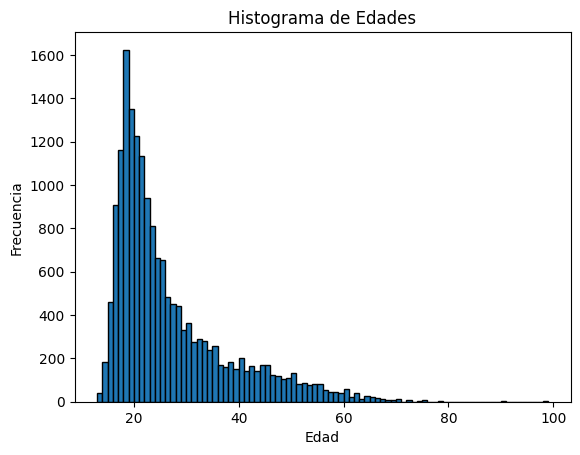

In [42]:
plt.hist(df["age"], bins=range(13, 100, 1), edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades')
plt.show()

# Limpieza

En primer lugar, dejamos sólo las filas de hombres y mujeres.

In [43]:
df = df.drop(df[(df["gender"] == 0) | (df["gender"] == 3)].index)


In [44]:
df["gender"].value_counts()

gender
2    9944
1    7298
Name: count, dtype: int64

Convertimos el género (int) a categórica (str)

In [45]:
# Mapear los valores numéricos a categorías
df['gender'] = df['gender'].map({1: 'man', 2: 'woman'})

Creamos una variable relativa al "Grupo de edad" de las personas de modo que:
- Adolescencia (de 13 a 19 años)
- Juventud (de 20 a 30 años)
- Adultez (de 31 a 64 años)
- Vejez (de 65 a 84 años)

In [46]:
# Definir los límites de los grupos de edad
bins = [13, 19, 30, 64, 84]
labels = ['Adolescence', 'Youth', 'Adulthood', 'Elderly']

# Crear la columna "Grupo de edad" utilizando pd.cut()
df['Age Group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [47]:
df["Age Group"].value_counts()

Age Group
Youth          8295
Adulthood      4581
Adolescence    4228
Elderly         122
Name: count, dtype: int64

En vista a la poca representación del grupo de la vejez, prescindimos de esas filas y usamos sólo la adolescencia, juventud y adultez.

In [48]:
# Encontrar índices de las filas que tienen "Elderly" en la columna "Age Group"
indices_a_eliminar = df[df['Age Group'] == 'Elderly'].index

# Eliminar las filas con los índices encontrados
df = df.drop(indices_a_eliminar)

In [49]:
df["Age Group"].value_counts()

Age Group
Youth          8295
Adulthood      4581
Adolescence    4228
Elderly           0
Name: count, dtype: int64

A continuación, se crean las 20 columnas relativas a las 20 subescalas del MSSCQ. Para la creación de cada columna, se lleva a cabo la media de los siguientes items. Hay que tener en cuenta que algunos items están invertidos (R), es decir, están formulados de forma inversa a lo que representa la categoría de la que forma parte, por lo que, posteriormente, habrá que invertir las respuestas:
1. sexual-anxiety (items 1‚ 21‚ 41‚ 61‚ 81) 
2. sexual self-efficacy (items 2‚ 22‚ 42‚ 62‚ 82) 
3. sexual-consciousness (3‚ 23‚ 43‚ 63‚ 83) 
4. motivation to avoid risky sex (items 4‚ 24‚ 44‚ 64‚ 84) 
5. chance/luck sexual control (items 5‚ 25‚ 45‚ 65‚ 85) 
6. sexual-preoccupation (items 6‚ 26‚ 46‚ 66‚ 86) 
7. sexual-assertiveness (items 7‚ 27R‚ 47R‚ 67‚ 87) 
8. sexual-optimism (items 8‚ 28‚ 48‚ 68R‚ 88R)
9. sexual problem self-blame (items 9‚ 29‚ 49‚ 69‚ 89)
19. sexual-monitoring (items 10‚ 30‚ 50‚ 70‚ 90)
11. sexual-motivation (items 11‚ 31‚ 51‚ 71‚ 91) 
12. sexual problem management (items 12‚ 32‚ 52‚ 72‚ 92) 
13. sexual-esteem (items 13‚ 33‚ 53‚ 73‚ 93)
14. sexual-satisfaction (items 14‚ 34‚ 54‚ 74‚ 94) 
15. power-other sexual control (items 15‚ 35‚ 55‚ 75‚ 95)
16. sexual self-schemata (items 16‚ 36‚ 56‚ 76‚ 96)
17. fear-of-sex (items 17‚ 37‚ 57‚ 77R‚ 97R)
18. sexual problem prevention (items 18‚ 38‚ 58‚ 78‚ 98) 
19. sexual-depression (items 19‚ 39‚ 59‚ 79‚ 99)
20. internal-sexual-control (items 20‚ 40‚ 60‚ 80‚ 100).

In [50]:
#Items que queremos invertir
items_to_invert = ['Q27', 'Q47', 'Q68', 'Q88', 'Q77', 'Q97']

# Invertir los items. Si en un item la respuesta era 1, ahora será 5. Si era 2, ahora será 4...
df[items_to_invert] = df[items_to_invert].apply(lambda x: 5 - x)

# Crear columnas por cada categoría o temática sexual mediante la media de la suma de los items correspondientes
df['Sexual_anxiety'] = df[['Q1', 'Q21', 'Q41', 'Q61', 'Q81']].mean(axis=1)
df['Sexual_self-efficacy'] = df[['Q2', 'Q22', 'Q42', 'Q62', 'Q82']].mean(axis=1)
df['Sexual_consciousness'] = df[['Q3', 'Q23', 'Q43', 'Q63', 'Q83']].mean(axis=1)
df['Motivation_to_avoid_risky_sex'] = df[['Q4', 'Q24', 'Q44', 'Q64', 'Q84']].mean(axis=1)
df['Chance/luck_sexual_control'] = df[['Q5', 'Q25', 'Q45', 'Q65', 'Q85']].mean(axis=1)
df['Sexual_preoccupation'] = df[['Q6', 'Q26', 'Q46', 'Q66', 'Q86']].mean(axis=1)
df['Sexual_assertiveness'] = df[['Q7', 'Q27', 'Q47', 'Q67', 'Q87']].mean(axis=1)
df['Sexual_optimism'] = df[['Q8', 'Q28', 'Q48', 'Q68', 'Q88']].mean(axis=1)
df['Sexual_problem_self-blame'] = df[['Q9', 'Q29', 'Q49', 'Q69', 'Q89']].mean(axis=1)
df['Sexual_monitoring'] = df[['Q10', 'Q30', 'Q50', 'Q70', 'Q90']].mean(axis=1)
df['Sexual_motivation'] = df[['Q11', 'Q31', 'Q51', 'Q71', 'Q91']].mean(axis=1)
df['Sexual_problem_management'] = df[['Q12', 'Q32', 'Q52', 'Q72', 'Q92']].mean(axis=1)
df['Sexual_self-esteem'] = df[['Q13', 'Q33', 'Q53', 'Q73', 'Q93']].mean(axis=1)
df['Sexual_satisfaction'] = df[['Q14', 'Q34', 'Q54', 'Q74', 'Q94']].mean(axis=1)
df['Power_other_sexual_control'] = df[['Q15', 'Q35', 'Q55', 'Q75', 'Q95']].mean(axis=1)
df['Sexual_self-schemata'] = df[['Q16', 'Q36', 'Q56', 'Q76', 'Q96']].mean(axis=1)
df['Fear_of_sex'] = df[['Q17', 'Q37', 'Q57', 'Q77', 'Q97']].mean(axis=1)
df['Sexual_problem_prevention'] = df[['Q18', 'Q38', 'Q58', 'Q78', 'Q98']].mean(axis=1)
df['Sexual_depression'] = df[['Q19', 'Q39', 'Q59', 'Q79', 'Q99']].mean(axis=1)
df['Internal_sexual_control'] = df[['Q20', 'Q40', 'Q60', 'Q80', 'Q100']].mean(axis=1)


In [51]:
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Sexual_motivation,Sexual_problem_management,Sexual_self-esteem,Sexual_satisfaction,Power_other_sexual_control,Sexual_self-schemata,Fear_of_sex,Sexual_problem_prevention,Sexual_depression,Internal_sexual_control
0,3,2,5,5,1,2,2,1,1,2,...,3.4,2.8,3.2,1.0,1.0,5.0,0.6,2.8,4.8,3.8
1,5,1,5,1,1,2,1,3,1,1,...,1.6,2.0,1.4,1.2,1.0,1.2,4.6,1.0,4.8,2.4
2,1,4,5,5,1,4,5,5,5,4,...,4.8,4.8,4.8,4.4,1.4,4.8,1.4,4.0,1.4,4.6
3,5,4,5,5,5,5,2,4,5,5,...,4.6,3.4,4.0,1.4,1.6,5.0,1.6,3.8,4.4,3.6
4,4,5,4,5,4,2,3,2,4,5,...,1.4,3.0,2.0,1.8,3.6,1.2,4.2,1.4,3.2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17680,1,4,5,5,2,1,1,2,4,3,...,4.6,4.4,3.4,2.8,1.0,4.4,0.6,4.4,1.8,4.6
17681,3,4,2,1,1,1,1,1,1,4,...,2.0,4.2,3.8,3.6,1.0,4.8,1.2,2.2,1.8,4.2
17682,2,4,4,3,2,2,4,5,5,3,...,4.0,4.0,4.4,2.2,1.0,5.0,1.8,4.6,3.0,4.6
17683,1,5,5,5,3,1,5,5,5,5,...,2.0,4.6,5.0,4.2,2.6,5.0,0.6,5.0,1.0,5.0


Borramos las columnas de los items, puesto que ya no vamos a trabajar con ellas, sólo con las dimensiones

In [52]:
df = df.drop(df.columns[0:100], axis = 1)

Guardamos el nuevo dataframe con datos limpios: género binario, grupos de edad sin vejez, columnas por cada categoría de estudio de sexualidad.

In [53]:
df.to_csv("df_q_dimension.csv", index = False)

In [54]:
df = pd.read_csv("./df_q_dimension.csv")

In [55]:
df

,age,gender,Age Group,Sexual_anxiety,Sexual_self-efficacy,Sexual_consciousness,Motivation_to_avoid_risky_sex,Chance/luck_sexual_control,Sexual_preoccupation,Sexual_assertiveness,...,Sexual_motivation,Sexual_problem_management,Sexual_self-esteem,Sexual_satisfaction,Power_other_sexual_control,Sexual_self-schemata,Fear_of_sex,Sexual_problem_prevention,Sexual_depression,Internal_sexual_control
0,23,man,Youth,3.8,2.8,4.2,5.0,1.2,1.2,3.6,...,3.4,2.8,3.2,1.0,1.0,5.0,0.6,2.8,4.8,3.8
1,25,woman,Youth,4.0,1.6,4.0,1.8,1.0,1.2,2.0,...,1.6,2.0,1.4,1.2,1.0,1.2,4.6,1.0,4.8,2.4
2,20,man,Youth,1.4,4.6,4.8,4.2,1.8,2.4,3.8,...,4.8,4.8,4.8,4.4,1.4,4.8,1.4,4.0,1.4,4.6
3,23,woman,Youth,3.6,4.0,5.0,4.8,5.0,3.8,3.0,...,4.6,3.4,4.0,1.4,1.6,5.0,1.6,3.8,4.4,3.6
4,50,woman,Adulthood,4.2,3.2,3.2,4.6,2.6,1.4,2.4,...,1.4,3.0,2.0,1.8,3.6,1.2,4.2,1.4,3.2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17115,24,man,Youth,1.6,3.2,3.6,5.0,1.2,1.0,2.6,...,4.6,4.4,3.4,2.8,1.0,4.4,0.6,4.4,1.8,4.6
17116,17,woman,Adolescence,1.6,4.8,4.2,3.6,1.2,1.0,1.6,...,2.0,4.2,3.8,3.6,1.0,4.8,1.2,2.2,1.8,4.2
17117,18,woman,Adolescence,2.0,4.0,4.4,4.2,2.4,2.2,3.8,...,4.0,4.0,4.4,2.2,1.0,5.0,1.8,4.6,3.0,4.6
17118,19,woman,Youth,1.0,5.0,4.4,4.4,2.6,1.2,4.6,...,2.0,4.6,5.0,4.2,2.6,5.0,0.6,5.0,1.0,5.0


In [56]:
df

,age,gender,Age Group,Sexual_anxiety,Sexual_self-efficacy,Sexual_consciousness,Motivation_to_avoid_risky_sex,Chance/luck_sexual_control,Sexual_preoccupation,Sexual_assertiveness,...,Sexual_motivation,Sexual_problem_management,Sexual_self-esteem,Sexual_satisfaction,Power_other_sexual_control,Sexual_self-schemata,Fear_of_sex,Sexual_problem_prevention,Sexual_depression,Internal_sexual_control
0,23,man,Youth,3.8,2.8,4.2,5.0,1.2,1.2,3.6,...,3.4,2.8,3.2,1.0,1.0,5.0,0.6,2.8,4.8,3.8
1,25,woman,Youth,4.0,1.6,4.0,1.8,1.0,1.2,2.0,...,1.6,2.0,1.4,1.2,1.0,1.2,4.6,1.0,4.8,2.4
2,20,man,Youth,1.4,4.6,4.8,4.2,1.8,2.4,3.8,...,4.8,4.8,4.8,4.4,1.4,4.8,1.4,4.0,1.4,4.6
3,23,woman,Youth,3.6,4.0,5.0,4.8,5.0,3.8,3.0,...,4.6,3.4,4.0,1.4,1.6,5.0,1.6,3.8,4.4,3.6
4,50,woman,Adulthood,4.2,3.2,3.2,4.6,2.6,1.4,2.4,...,1.4,3.0,2.0,1.8,3.6,1.2,4.2,1.4,3.2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17115,24,man,Youth,1.6,3.2,3.6,5.0,1.2,1.0,2.6,...,4.6,4.4,3.4,2.8,1.0,4.4,0.6,4.4,1.8,4.6
17116,17,woman,Adolescence,1.6,4.8,4.2,3.6,1.2,1.0,1.6,...,2.0,4.2,3.8,3.6,1.0,4.8,1.2,2.2,1.8,4.2
17117,18,woman,Adolescence,2.0,4.0,4.4,4.2,2.4,2.2,3.8,...,4.0,4.0,4.4,2.2,1.0,5.0,1.8,4.6,3.0,4.6
17118,19,woman,Youth,1.0,5.0,4.4,4.4,2.6,1.2,4.6,...,2.0,4.6,5.0,4.2,2.6,5.0,0.6,5.0,1.0,5.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17120 entries, 0 to 17119
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            17120 non-null  int64  
 1   gender                         17120 non-null  object 
 2   Age Group                      17104 non-null  object 
 3   Sexual_anxiety                 17120 non-null  float64
 4   Sexual_self-efficacy           17120 non-null  float64
 5   Sexual_consciousness           17120 non-null  float64
 6   Motivation_to_avoid_risky_sex  17120 non-null  float64
 7   Chance/luck_sexual_control     17120 non-null  float64
 8   Sexual_preoccupation           17120 non-null  float64
 9   Sexual_assertiveness           17120 non-null  float64
 10  Sexual_optimism                17120 non-null  float64
 11  Sexual_problem_self-blame      17120 non-null  float64
 12  Sexual_monitoring              17120 non-null 

## Análisis Univariable de las variables numéricas

In [58]:
df.describe()

,age,Sexual_anxiety,Sexual_self-efficacy,Sexual_consciousness,Motivation_to_avoid_risky_sex,Chance/luck_sexual_control,Sexual_preoccupation,Sexual_assertiveness,Sexual_optimism,Sexual_problem_self-blame,...,Sexual_motivation,Sexual_problem_management,Sexual_self-esteem,Sexual_satisfaction,Power_other_sexual_control,Sexual_self-schemata,Fear_of_sex,Sexual_problem_prevention,Sexual_depression,Internal_sexual_control
count,17120.000000,17120.000000,17120.000000,17120.000000,17120.000000,17120.000000,17120.000000,17120.000000,17120.000000,17120.000000,...,17120.000000,17120.000000,17120.000000,17120.000000,17120.000000,17120.000000,17120.000000,17120.000000,17120.000000,17120.000000
mean,26.872313,2.628855,3.445607,3.925164,4.073657,2.341752,2.528633,2.494322,3.065981,3.212383,...,3.389766,3.632757,3.151192,2.856519,1.937734,3.877079,2.006250,3.436367,2.519953,3.723026
std,75.604866,1.222238,1.110168,0.923919,0.944489,1.052305,1.246419,1.119650,0.995191,1.024990,...,1.227906,0.904962,1.205814,1.280192,1.014864,1.110792,1.280465,1.000570,1.256699,0.919618
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.400000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000
25%,19.000000,1.600000,2.600000,3.400000,3.600000,1.400000,1.400000,1.600000,2.400000,2.600000,...,2.600000,3.200000,2.200000,1.800000,1.000000,3.200000,0.800000,2.800000,1.400000,3.200000
50%,22.000000,2.400000,3.600000,4.200000,4.200000,2.200000,2.400000,2.400000,3.200000,3.200000,...,3.600000,3.800000,3.200000,2.800000,1.600000,4.200000,1.600000,3.600000,2.400000,3.800000
75%,30.000000,3.600000,4.400000,4.600000,4.800000,3.000000,3.600000,3.400000,3.800000,4.000000,...,4.400000,4.200000,4.200000,4.000000,2.600000,4.800000,3.000000,4.200000,3.400000,4.400000
max,9599.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.800000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [59]:
# ¿Cómo es posible que ahora la edad máx sea 95.99 y al principio era de 83.?

## Análisis

### **Hipótesis principal**: El género y la edad tienen relación con la ansiedad sexual que pueda tener una persona.


En primer lugar, se comprueba el supuesto de normalidad de la variable dependiente. Lo hacemos mediante la Prueba de Kolmogorov-Smirnov al contar en esta base de datos con una muestra superior a 50 filas. 

In [60]:
from scipy.stats import kstest
ks_statistic, p_value = kstest(df['Sexual_anxiety'], 'norm')
print(f"Estadístico KS: {ks_statistic}")
print(f"Valor P: {p_value}")

Estadístico KS: 0.8270339984049915
Valor P: 0.0


La distribución no es normal, por lo que se llevará a cabo prueba no paramétrica de análisis. En este caso, prueba U Mann-Whitney para analizar la relación entre ansiedad sexual y género.

In [61]:
from scipy.stats import mannwhitneyu

sexual_anxiety_woman = df[df['gender'] == 'woman']['Sexual_anxiety']
sexual_anxiety_man = df[df['gender'] == 'man']['Sexual_anxiety']
u_statistic, p_value = mannwhitneyu(sexual_anxiety_woman, sexual_anxiety_man, alternative='two-sided')
print('U Statistic:', u_statistic)
print('P-Value:', p_value)

U Statistic: 33566415.0
P-Value: 1.2993363323080643e-11


Parece que sí hay relación significativa entre el género y la ansiedad sexual sufrida. Veamos quién sufre más esta ansiedad.

In [62]:
mean_gender_anxiety = df.groupby('gender')['Sexual_anxiety'].mean()
mean_gender_anxiety

gender
man      2.705285
woman    2.573262
Name: Sexual_anxiety, dtype: float64

Los resultados apuntan a que los hombres sufren más ansiedad sexual que las mujeres, la cual es definida como la tendencia a sentir tensión, incomodidad y ansiedad acerca de los aspectos sexuales de la propia vida.

In [63]:
data_to_plot = ["Sexual_anxiety", "Sexual_self-efficacy", "Sexual_consciousness", "Motivation_to_avoid_risky_sex" , "Chance/luck_sexual_control", "Sexual_preoccupation", "Sexual_assertiveness", "Sexual_optimism", "Sexual_problem_self-blame", "Sexual_monitoring", "Sexual_motivation", "Sexual_problem_management", "Sexual_self-esteem", "Sexual_satisfaction", "Power_other_sexual_control", "Sexual_self-schemata", "Fear_of_sex", "Sexual_problem_prevention", "Sexual_depression", "Internal_sexual_control"]
# Definir una función para realizar la prueba de Mann-Whitney U
def mann_whitney_test(column):
    group_man = df[df['gender'] == 'man'][column]
    group_woman = df[df['gender'] == 'woman'][column]
    mean_man = group_man.mean()
    mean_woman = group_woman.mean()

    u_statistic, p_value = mannwhitneyu(group_man, group_woman, alternative='two-sided')
    return u_statistic, p_value, mean_man, mean_woman

# Realizar la prueba de Mann-Whitney U para cada columna
for column in data_to_plot:
    u_statistic, p_value,  mean_man, mean_woman = mann_whitney_test(column)
    print(f'Columna: {column}')
    print(f'U Statistic: {u_statistic}')
    print(f'P-Value: {p_value}')
    print(f"La media de los hombres es de {mean_man} y la media de las mujeres es de {mean_woman}")
    print("\n")

Columna: Sexual_anxiety
U Statistic: 37881984.0
P-Value: 1.2993363323080643e-11
La media de los hombres es de 2.7052850603412404 y la media de las mujeres es de 2.5732620320855615


Columna: Sexual_self-efficacy
U Statistic: 31937340.0
P-Value: 1.4764284325617296e-32
La media de los hombres es de 3.330808711333056 y la media de las mujeres es de 3.5291090707294925


Columna: Sexual_consciousness
U Statistic: 35755988.0
P-Value: 0.9203992838480319
La media de los hombres es de 3.938715494520738 y la media de las mujeres es de 3.9153062254061144


Columna: Motivation_to_avoid_risky_sex
U Statistic: 30479780.5
P-Value: 1.0396454645913423e-61
La media de los hombres es de 3.9271188791788045 y la media de las mujeres es de 4.180244173140954


Columna: Chance/luck_sexual_control
U Statistic: 41688618.0
P-Value: 3.282160395713404e-78
La media de los hombres es de 2.525260091552226 y la media de las mujeres es de 2.2082736353546566


Columna: Sexual_preoccupation
U Statistic: 41720916.5
P-Valu

Veamos qué ocurre con la edad. ¿Hay relación entre la edad y la ansiedad sexual vivenciada? Para ello vamos a hacer la prueba no paramétrica de Kruskal-Wallis y vamos a visualizar las distribuciones de ansiedad por grupo de edad.

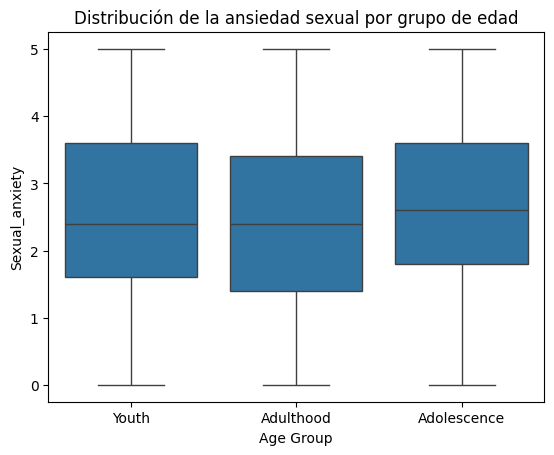

Estadística de prueba de Kruskal-Wallis: 64.36201918980251
Valor p: 1.0567326129604092e-14


In [64]:
from scipy.stats import kruskal

# Utiliza boxplot para visualizar la distribución de ansiedad sexual por grupo de edad
sns.boxplot(x='Age Group', y='Sexual_anxiety', data=df)
plt.title('Distribución de la ansiedad sexual por grupo de edad')
plt.show()

# Aplica la prueba de Kruskal-Wallis para analizar la relación
resultado_kw = kruskal(*[grupo['Sexual_anxiety'] for nombre, grupo in df.groupby('Age Group')])

print('Estadística de prueba de Kruskal-Wallis:', resultado_kw.statistic)
print('Valor p:', resultado_kw.pvalue)

En vista de los resultados, concluimos que sí hay relación significativa entre la edad y la ansiedad sexual manifestada. 

Ampliamos la búsqueda para analizar si hay diferencias significativas en cada uno de los aspectos que mide el MSSCQ.

In [65]:
# Realiza la prueba de Kruskal-Wallis para cada variable dependiente["Sexual_anxiety", "Sexual_self-efficacy", "Sexual_consciousness", "Motivation_to_avoid_risky_sex" , "Chance/luck_sexual_control", "Sexual_preoccupation", "Sexual_assertiveness", "Sexual_optimism", "Sexual_problem_self-blame", "Sexual_monitoring", "Sexual_motivation", "Sexual_problem_management", "Sexual_self-esteem", "Sexual_satisfaction", "Power_other_sexual_control", "Sexual_self-schemata", "Fear_of_sex", "Sexual_problem_prevention", "Sexual_depression", "Internal_sexual_control"]
for categories in data_to_plot:
    resultado_kw = kruskal(*[grupo[categories] for nombre, grupo in df.groupby('Age Group')])
    
    # Imprime el resultado para cada variable dependiente
    print('Variable Dependiente:', categories)
    print('Estadística de prueba de Kruskal-Wallis:', resultado_kw.statistic)
    print('Valor p:', resultado_kw.pvalue)
    print('')

Variable Dependiente: Sexual_anxiety
Estadística de prueba de Kruskal-Wallis: 64.36201918980251
Valor p: 1.0567326129604092e-14

Variable Dependiente: Sexual_self-efficacy
Estadística de prueba de Kruskal-Wallis: 112.19355236750806
Valor p: 4.3398992827227045e-25

Variable Dependiente: Sexual_consciousness
Estadística de prueba de Kruskal-Wallis: 32.73877837533437
Valor p: 7.777940269479895e-08

Variable Dependiente: Motivation_to_avoid_risky_sex
Estadística de prueba de Kruskal-Wallis: 64.58009962973686
Valor p: 9.475661653574958e-15

Variable Dependiente: Chance/luck_sexual_control
Estadística de prueba de Kruskal-Wallis: 36.506771987603095
Valor p: 1.182102638895353e-08

Variable Dependiente: Sexual_preoccupation
Estadística de prueba de Kruskal-Wallis: 40.05067736847696
Valor p: 2.009582828877734e-09

Variable Dependiente: Sexual_assertiveness
Estadística de prueba de Kruskal-Wallis: 145.9980347888483
Valor p: 1.9812056655533643e-32

Variable Dependiente: Sexual_optimism
Estadístic

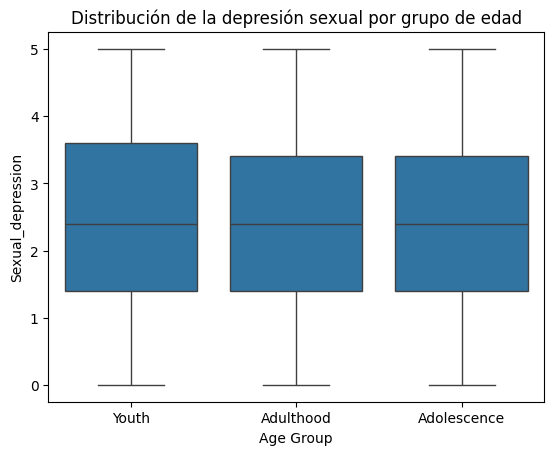

In [66]:
# Utiliza boxplot para visualizar la distribución de depresión sexual por grupo de edad
sns.boxplot(x='Age Group', y='Sexual_depression', data=df)
plt.title('Distribución de la depresión sexual por grupo de edad')
plt.show()

### H1. Hay relación entre ansiedad sexual y depresión sexual.


In [67]:
from scipy.stats import pearsonr

# Calcular el coeficiente de correlación de Pearson y el valor p entre dos columnas
corr_coefficient, p_value = pearsonr(df['Sexual_depression'], df['Sexual_anxiety'])

print("Coeficiente de correlación de Pearson:", corr_coefficient)
print("Valor p de significancia:", p_value)


Coeficiente de correlación de Pearson: 0.7966696882850272
Valor p de significancia: 0.0


In [68]:
numeric_df = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Ver la correlación con la variable 'Sexual_anxiety'
target_correlation = correlation_matrix['Sexual_anxiety'].sort_values(ascending=False)

print(target_correlation)

Sexual_anxiety                   1.000000
Sexual_depression                0.796670
Fear_of_sex                      0.600682
Chance/luck_sexual_control       0.402817
Power_other_sexual_control       0.385152
Sexual_monitoring                0.350775
Sexual_problem_self-blame        0.194235
Motivation_to_avoid_risky_sex    0.129386
Sexual_preoccupation             0.116021
age                             -0.004636
Sexual_problem_management       -0.038844
Sexual_problem_prevention       -0.064591
Internal_sexual_control         -0.133050
Sexual_motivation               -0.139798
Sexual_consciousness            -0.146704
Sexual_self-schemata            -0.187160
Sexual_self-efficacy            -0.462351
Sexual_assertiveness            -0.491750
Sexual_self-esteem              -0.530553
Sexual_satisfaction             -0.551023
Sexual_optimism                 -0.588929
Name: Sexual_anxiety, dtype: float64


### H2. Las mujeres sienten mayor motivación para evitar situaciones sexuales de riesgo. 


In [70]:
sexual_risk_woman = df[df['gender'] == 'woman']['Motivation_to_avoid_risky_sex']
sexual_risk_man = df[df['gender'] == 'man']['Motivation_to_avoid_risky_sex']
u_statistic, p_value = mannwhitneyu(sexual_risk_woman, sexual_risk_man, alternative='two-sided')
print('U Statistic:', u_statistic)
print('P-Value:', p_value)

U Statistic: 40968618.5
P-Value: 1.0396454645913423e-61


In [72]:
mean_gender_risk = df.groupby('gender')['Motivation_to_avoid_risky_sex'].mean()
mean_gender_risk

gender
man      3.927119
woman    4.180244
Name: Motivation_to_avoid_risky_sex, dtype: float64

Los resultados concluyen que las mujeres manifiestan de manera significativa una mayor motivación a evitar situaciones sexuales de riesgo que los hombres.

### H3. Las personas con mayor asertividad sexual viven de manera más satisfactoria su sexualidad.


In [69]:
# Calcular el coeficiente de correlación de Pearson y el valor p entre dos columnas
corr_coefficient, p_value = pearsonr(df['Sexual_assertiveness'], df['Sexual_satisfaction'])

print("Coeficiente de correlación de Pearson:", corr_coefficient)
print("Valor p de significancia:", p_value)


Coeficiente de correlación de Pearson: 0.515412503311093
Valor p de significancia: 0.0


El resultado manifiesta que sí hay relación positiva entre manifestar asertividad sexual y disfrutar de las experiencias sexuales.

### H4. Las personas adultas tienen mayor conciencia sexual que las personas adolescentes.


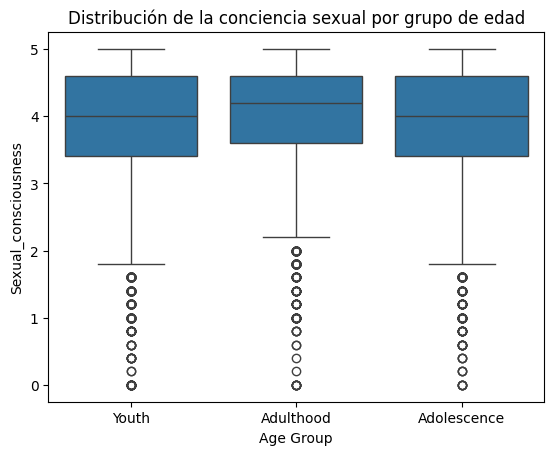

Estadística de prueba de Kruskal-Wallis: 32.73877837533437
Valor p: 7.777940269479895e-08


In [74]:
sns.boxplot(x='Age Group', y='Sexual_consciousness', data=df)
plt.title('Distribución de la conciencia sexual por grupo de edad')
plt.show()

# Aplica la prueba de Kruskal-Wallis para analizar la relación
resultado_kw = kruskal(*[grupo['Sexual_consciousness'] for nombre, grupo in df.groupby('Age Group')])

print('Estadística de prueba de Kruskal-Wallis:', resultado_kw.statistic)
print('Valor p:', resultado_kw.pvalue)

Efectivamente, las personas adultas manifiestan una mayor conciencia sexual, es decir, manifiestan una mayor tendencia a pensar y reflexionar acerca de la naturaleza de la propia sexualidad.

### H5. Las personas adolescentes manifiestan más miedo al sexo que las personas adultas.

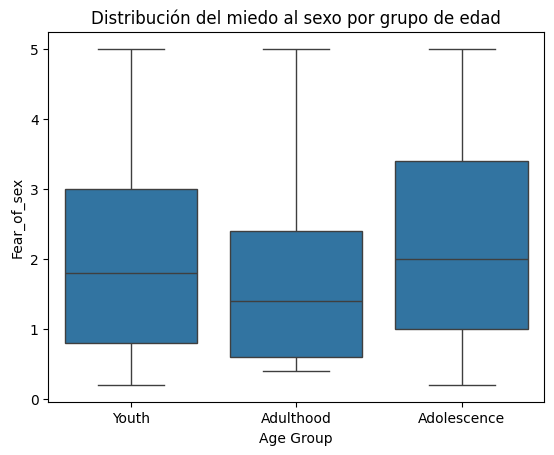

Estadística de prueba de Kruskal-Wallis: 424.99790114292654
Valor p: 5.162717442346319e-93


In [75]:
sns.boxplot(x='Age Group', y='Fear_of_sex', data=df)
plt.title('Distribución del miedo al sexo por grupo de edad')
plt.show()

# Aplica la prueba de Kruskal-Wallis para analizar la relación
resultado_kw = kruskal(*[grupo['Fear_of_sex'] for nombre, grupo in df.groupby('Age Group')])

print('Estadística de prueba de Kruskal-Wallis:', resultado_kw.statistic)
print('Valor p:', resultado_kw.pvalue)

Hay diferencia significativa por la que la adolescencia vive con mayor miedo la sexualidad que las personas adultas.

### EXTRAS:

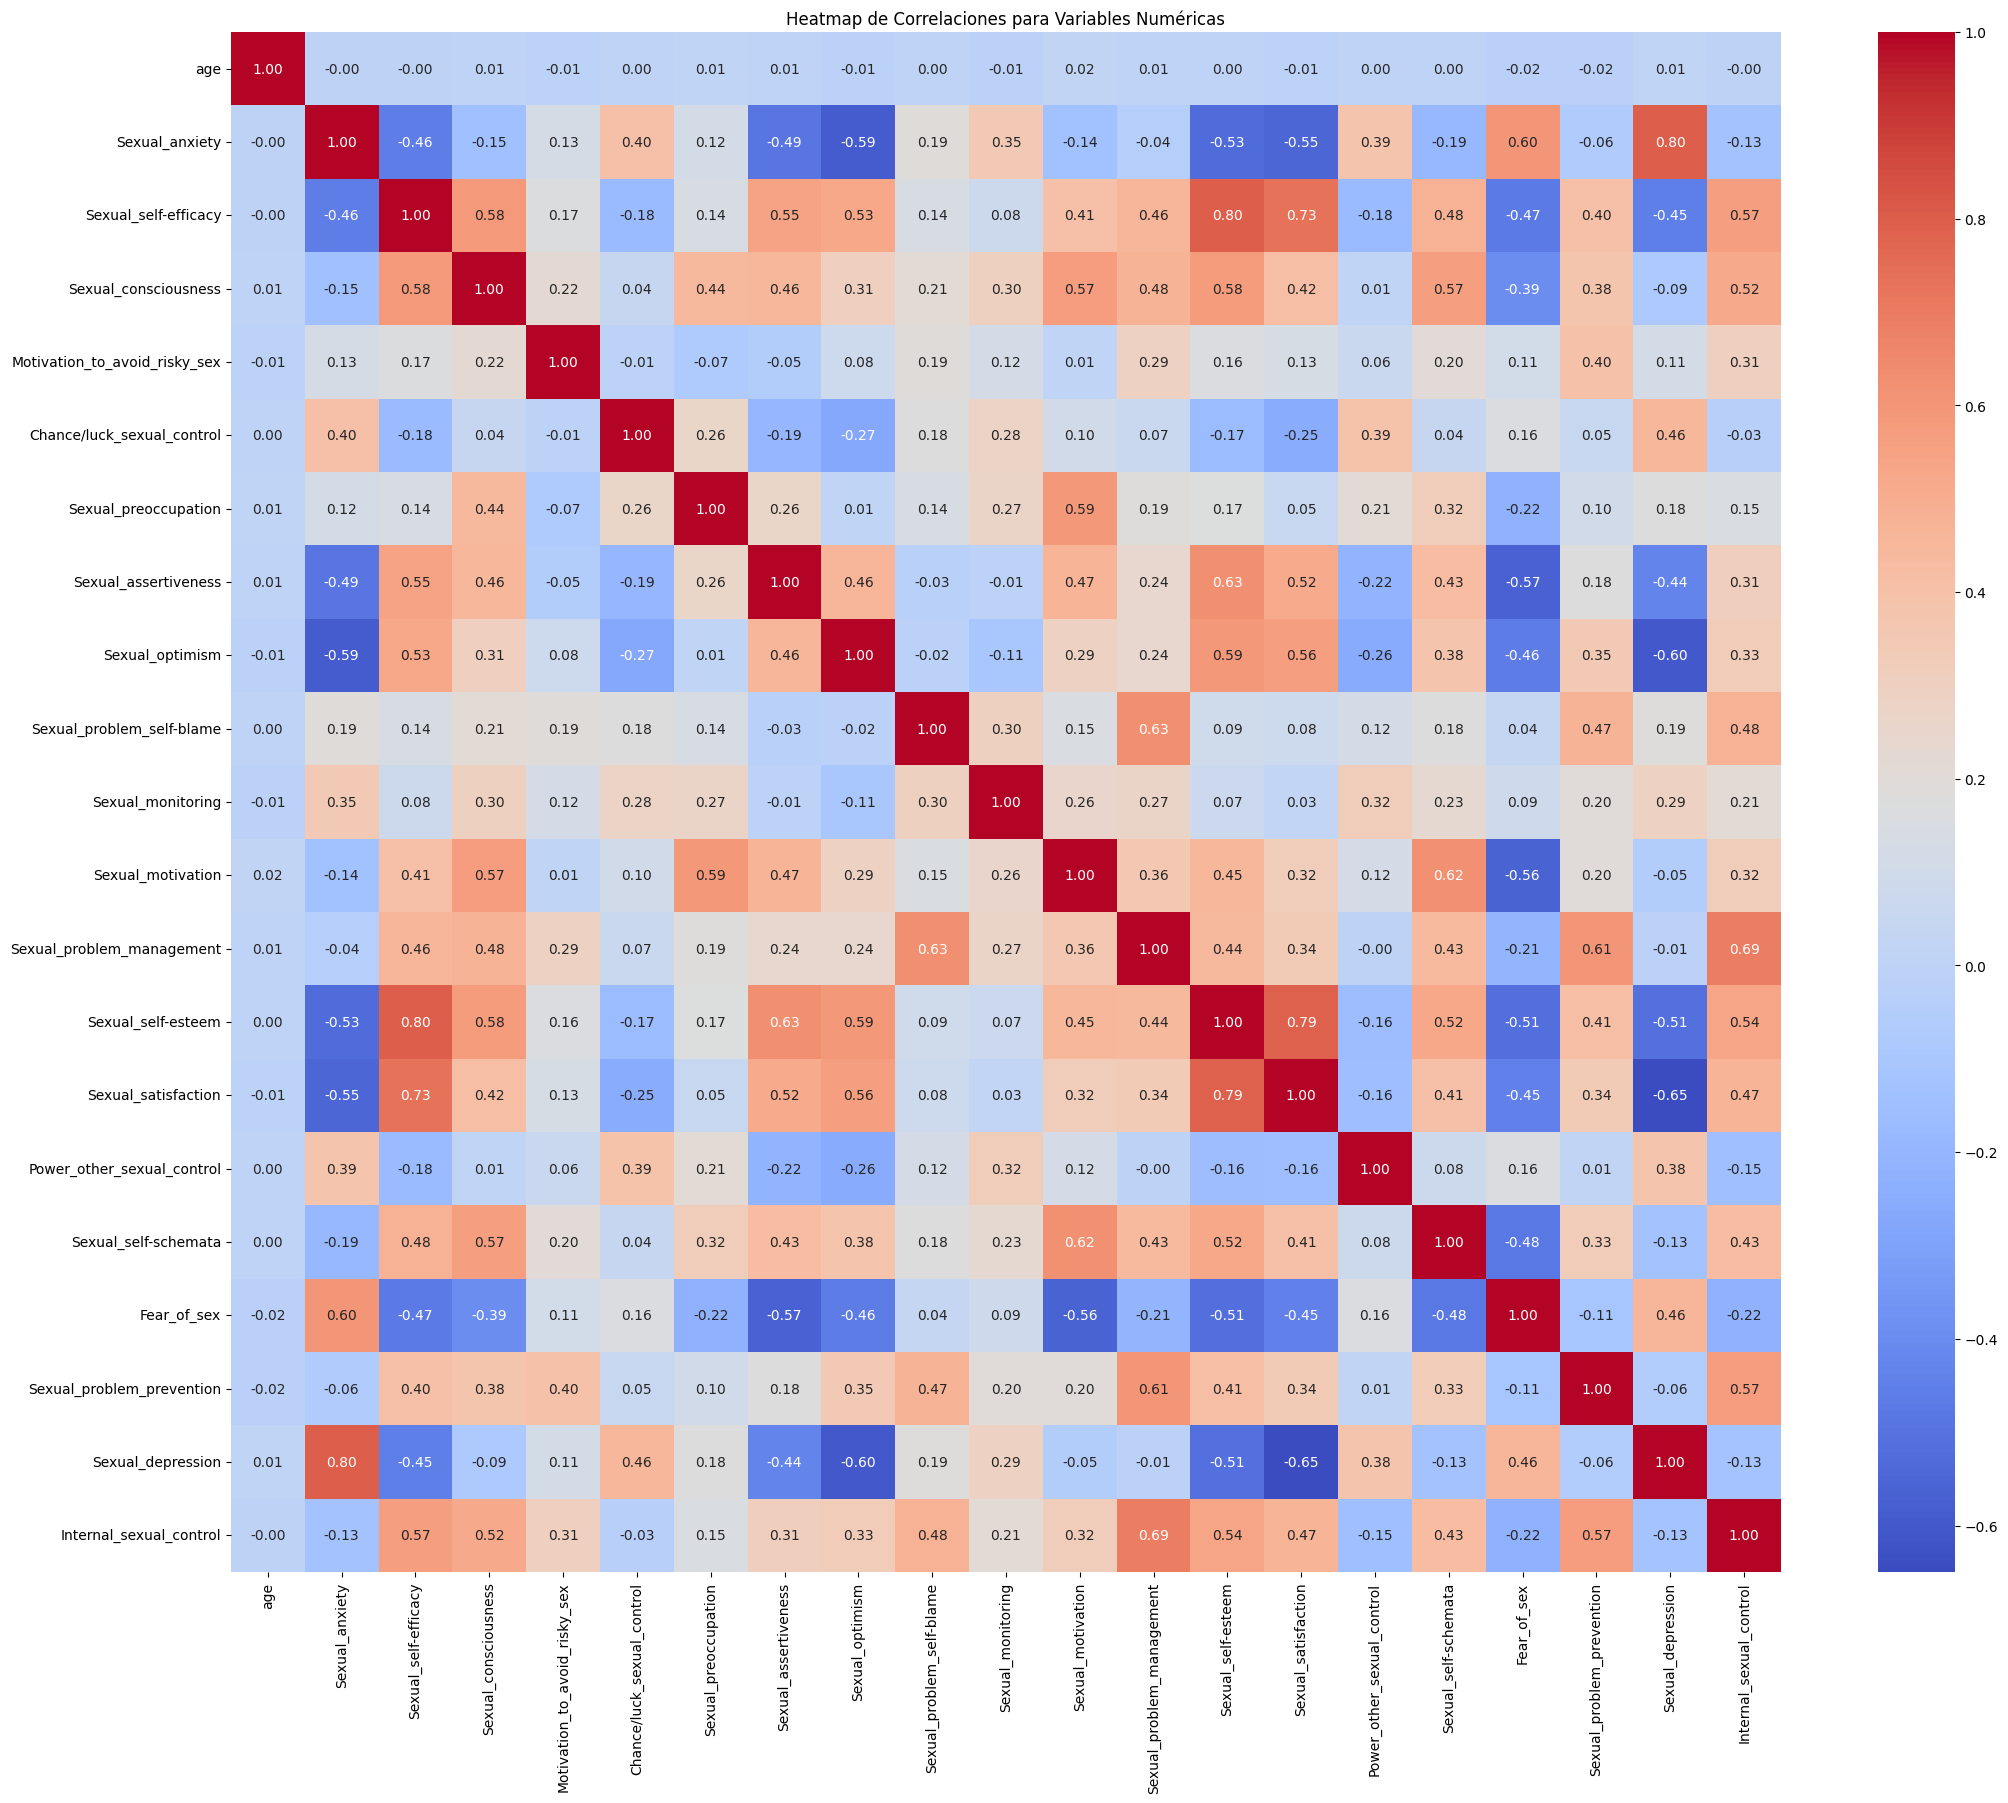

In [77]:
# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Crear el mapa de calor
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlaciones para Variables Numéricas')
plt.show()

¿Qué hace falta para una buena autoestima sexual?

In [78]:
numeric_df = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Ver la correlación con la variable Autoestima sexual
target_correlation = correlation_matrix['Sexual_self-esteem'].sort_values(ascending=False)

print(target_correlation)

Sexual_self-esteem               1.000000
Sexual_self-efficacy             0.796669
Sexual_satisfaction              0.791116
Sexual_assertiveness             0.632337
Sexual_optimism                  0.591560
Sexual_consciousness             0.575763
Internal_sexual_control          0.537943
Sexual_self-schemata             0.523958
Sexual_motivation                0.452877
Sexual_problem_management        0.440594
Sexual_problem_prevention        0.414461
Sexual_preoccupation             0.174808
Motivation_to_avoid_risky_sex    0.161598
Sexual_problem_self-blame        0.091378
Sexual_monitoring                0.068422
age                              0.002034
Power_other_sexual_control      -0.161163
Chance/luck_sexual_control      -0.166686
Sexual_depression               -0.511736
Fear_of_sex                     -0.514708
Sexual_anxiety                  -0.530553
Name: Sexual_self-esteem, dtype: float64


¿Y cuál es la clave de la satisfacción sexual?

In [79]:
numeric_df = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Ver la correlación con la variable satisfacción sexual
target_correlation = correlation_matrix['Sexual_satisfaction'].sort_values(ascending=False)

print(target_correlation)

Sexual_satisfaction              1.000000
Sexual_self-esteem               0.791116
Sexual_self-efficacy             0.734710
Sexual_optimism                  0.562318
Sexual_assertiveness             0.515413
Internal_sexual_control          0.467276
Sexual_consciousness             0.415683
Sexual_self-schemata             0.407058
Sexual_problem_management        0.342616
Sexual_problem_prevention        0.340043
Sexual_motivation                0.321894
Motivation_to_avoid_risky_sex    0.130163
Sexual_problem_self-blame        0.084409
Sexual_preoccupation             0.050014
Sexual_monitoring                0.025291
age                             -0.005594
Power_other_sexual_control      -0.155780
Chance/luck_sexual_control      -0.252590
Fear_of_sex                     -0.447210
Sexual_anxiety                  -0.551023
Sexual_depression               -0.649782
Name: Sexual_satisfaction, dtype: float64
